# Imports

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Visualise

In [2]:
def plot_classes(X, y):
    y = y.reshape(-1)
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], c='orange', marker='o', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Class Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Part 1

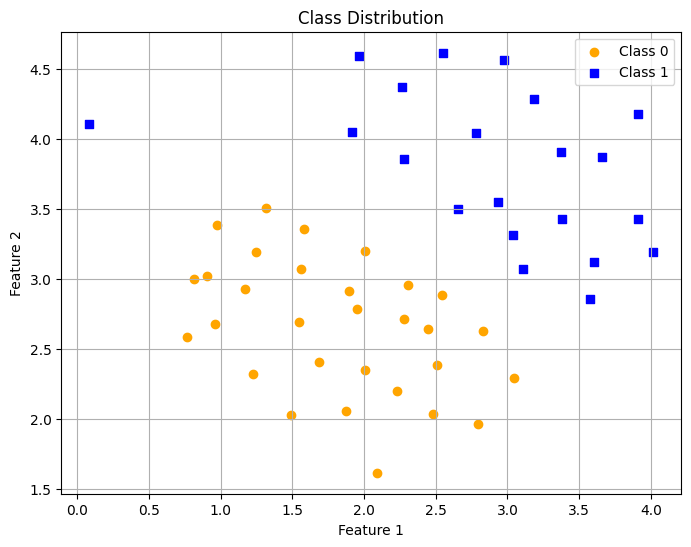

In [7]:
mat=loadmat('./Dataset/data1.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

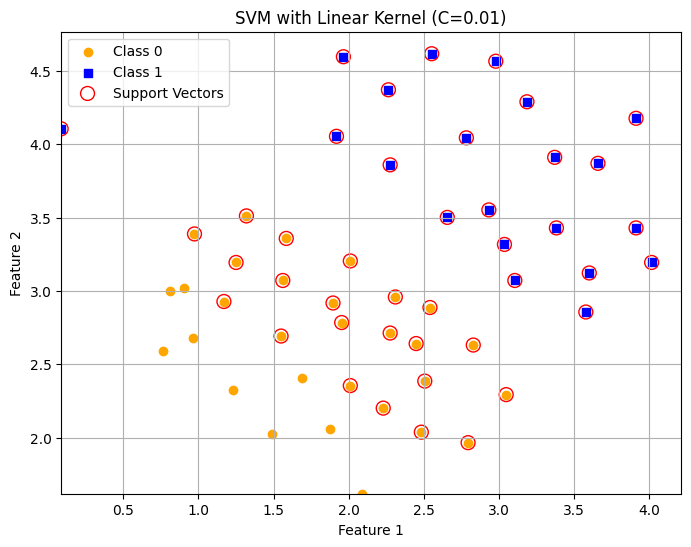

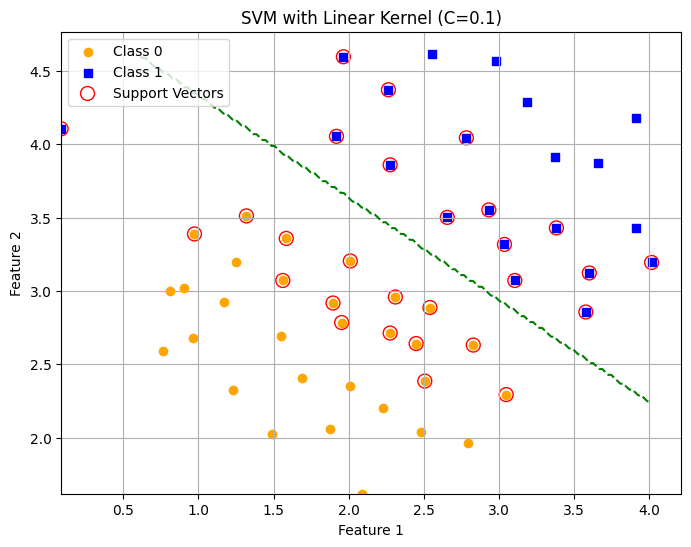

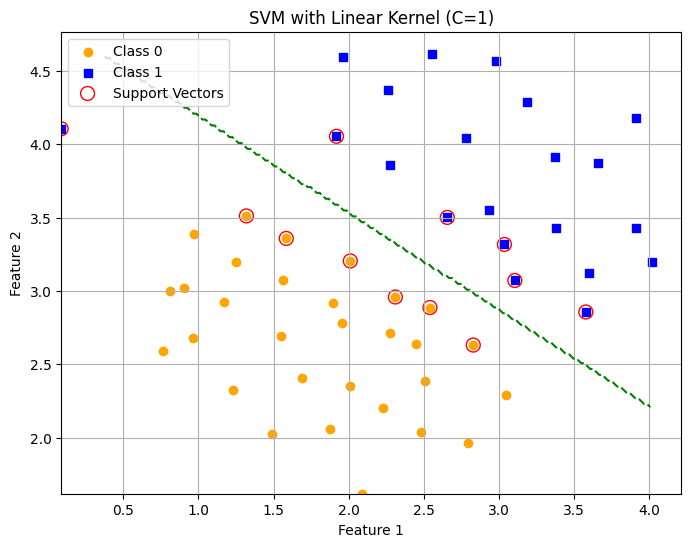

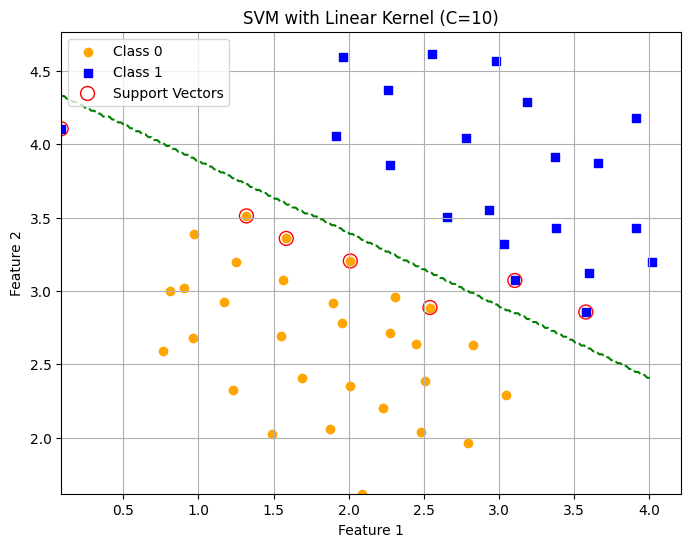

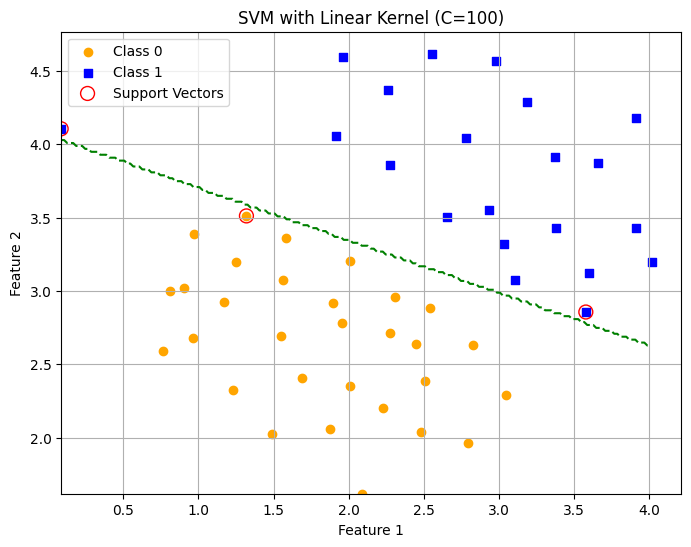

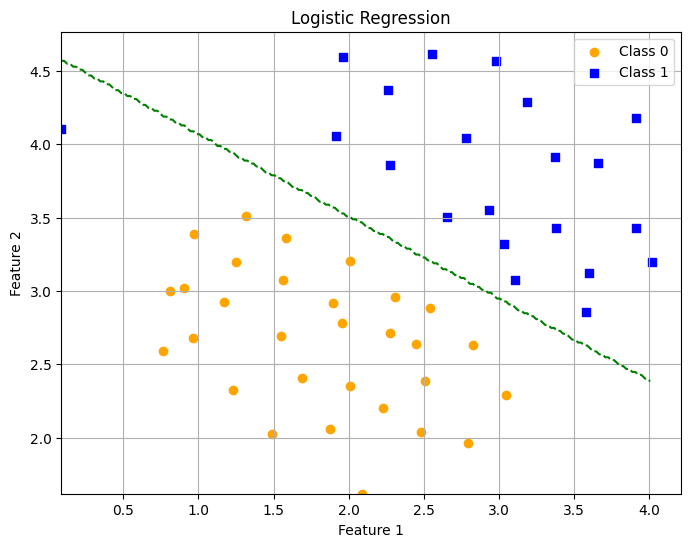

In [ ]:
# Insert Your Code Here

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(model, X, y, title):
    y = y.reshape(-1)
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], c='orange', marker='o', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1')
    
    # Create mesh to plot decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='green', levels=[0.5], linestyles='dashed')
    
    # Plot support vectors
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                   s=100, facecolors='none', edgecolors='red', label='Support Vectors')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

mat = loadmat('./Dataset/data1.mat')
X = mat['X']
y = mat['y'].astype(int)

for C in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y.ravel())
    plot_decision_boundary(svm, X, y, f'SVM with Linear Kernel (C={C})')

lr = LogisticRegression()
lr.fit(X, y.ravel())
plot_decision_boundary(lr, X, y, 'Logistic Regression')

# Part 2

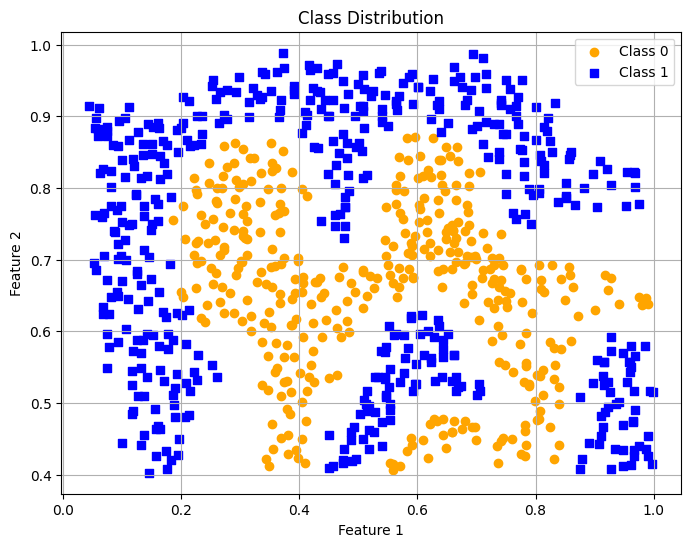

In [24]:
mat=loadmat('./Dataset/data2.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

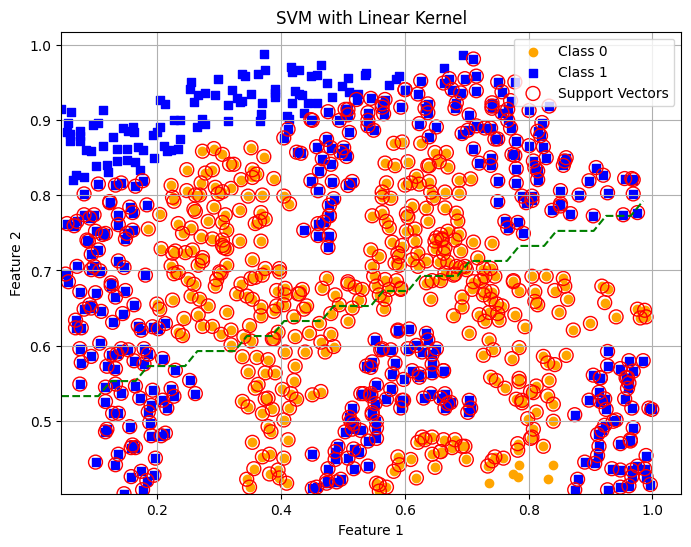

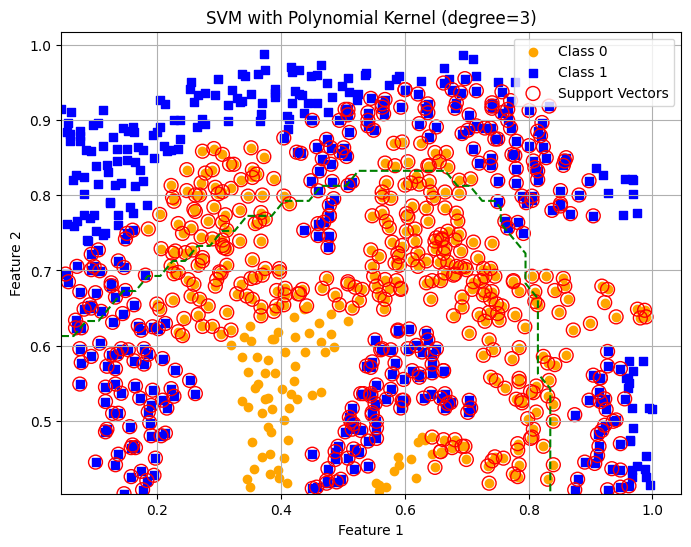

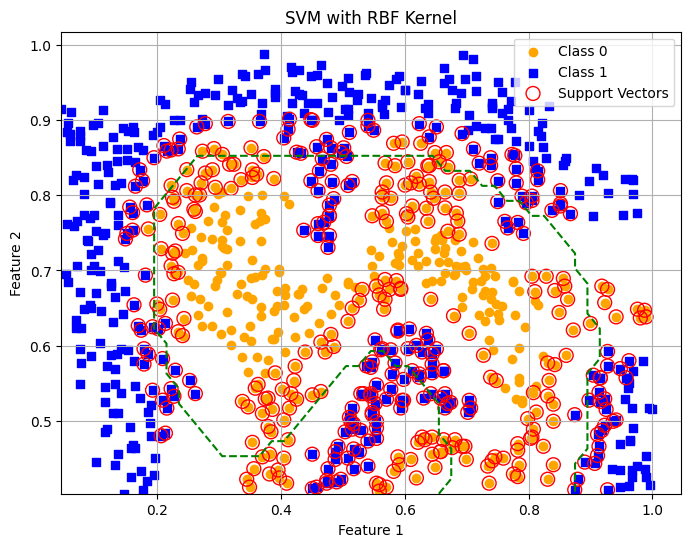

In [ ]:
mat = loadmat('./Dataset/data2.mat')
X = mat['X']
y = mat['y'].astype(int)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y.ravel())
plot_decision_boundary(svm_linear, X, y, 'SVM with Linear Kernel')

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X, y.ravel())
plot_decision_boundary(svm_poly, X, y, 'SVM with Polynomial Kernel (degree=3)')

svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X, y.ravel())
plot_decision_boundary(svm_rbf, X, y, 'SVM with RBF Kernel')

# Part 3

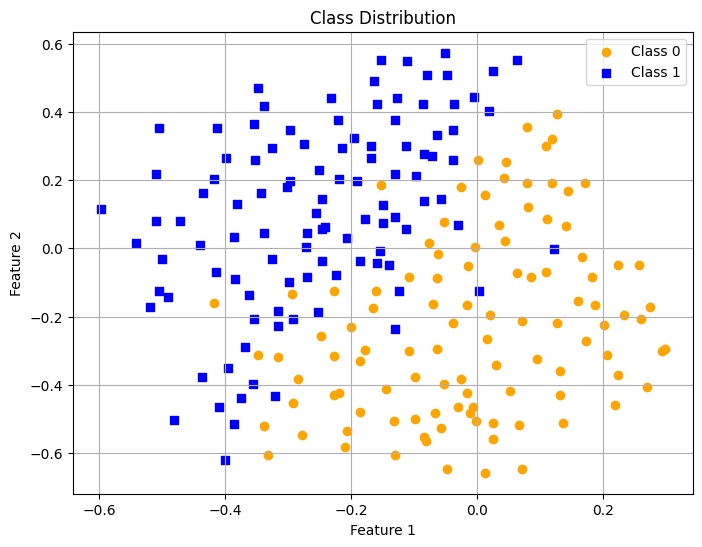

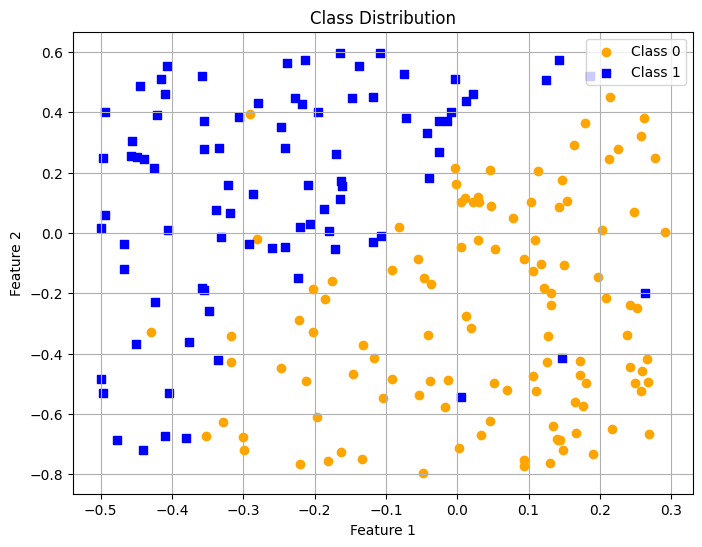

In [10]:
mat=loadmat('./Dataset/data3.mat')

X=mat['X']
y=mat['y'].astype(int)

Xval=mat['Xval']
yval=mat['yval'].astype(int)
plot_classes(X,y)
plot_classes(Xval,yval)

Best validation accuracy: 96.00%
Best parameters: {'kernel': 'rbf', 'C': 100}


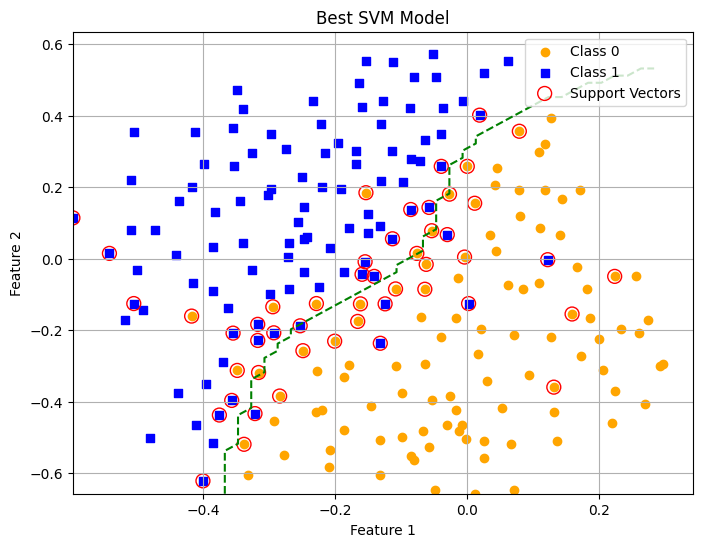

In [ ]:
mat = loadmat('./Dataset/data3.mat')
X = mat['X']
y = mat['y'].astype(int)
Xval = mat['Xval']
yval = mat['yval'].astype(int)

best_score = 0
best_params = {}
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    if kernel == 'poly':
        for degree in [2, 3, 4]:
            for C in [0.1, 1, 10, 100]:
                svm = SVC(kernel=kernel, degree=degree, C=C, gamma='scale')
                svm.fit(X, y.ravel())
                score = svm.score(Xval, yval.ravel())
                if score > best_score:
                    best_score = score
                    best_params = {'kernel': kernel, 'degree': degree, 'C': C}
    else:
        for C in [0.1, 1, 10, 100]:
            svm = SVC(kernel=kernel, C=C, gamma='scale')
            svm.fit(X, y.ravel())
            score = svm.score(Xval, yval.ravel())
            if score > best_score:
                best_score = score
                best_params = {'kernel': kernel, 'C': C}

print(f"Best validation accuracy: {best_score:.2%}")
print("Best parameters:", best_params)

# Train final model with best parameters
if best_params['kernel'] == 'poly':
    best_svm = SVC(kernel=best_params['kernel'], degree=best_params['degree'], 
                   C=best_params['C'], gamma='scale')
else:
    best_svm = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma='scale')
    
best_svm.fit(X, y.ravel())
plot_decision_boundary(best_svm, X, y, 'Best SVM Model')

# بخش دوم #

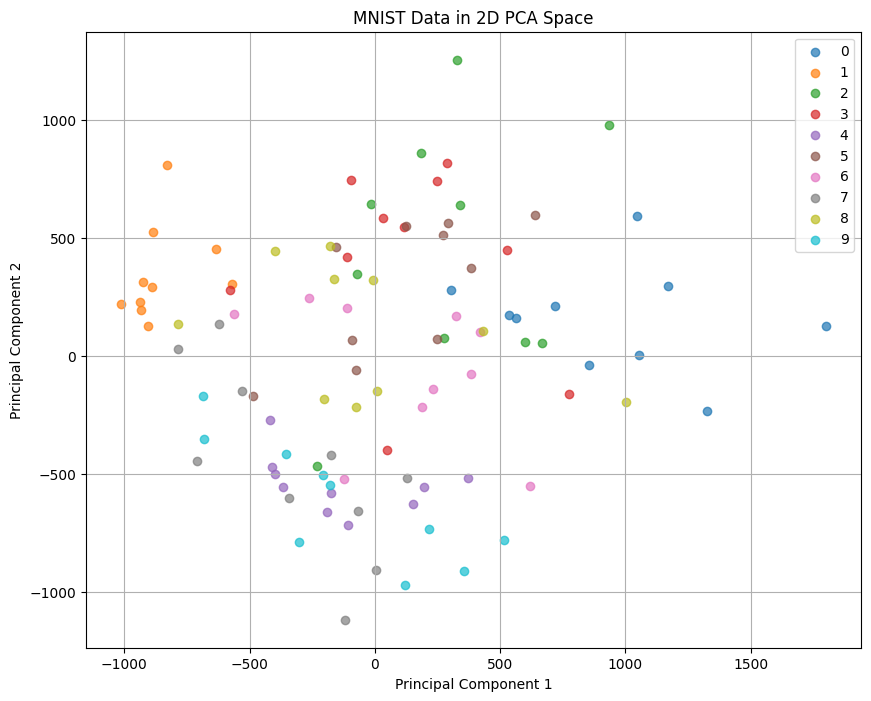

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# 100 samples (10 per class)
plt.figure(figsize=(10, 8))
for i in range(10):
    idx = np.where(y_train == i)[0][:10]
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=str(i), alpha=0.7)
plt.title('MNIST Data in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from itertools import combinations

class OneVsOneSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, kernel='rbf', C=1.0, gamma='scale'):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.classes_ = None
        self.models_ = {}
        
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Train one classifier per pair of classes
        for (i, j) in combinations(range(n_classes), 2):
            class_i = self.classes_[i]
            class_j = self.classes_[j]
            
            # Get data for these two classes
            idx = np.logical_or(y == class_i, y == class_j)
            X_pair = X[idx]
            y_pair = y[idx]
            y_pair_binary = np.where(y_pair == class_i, 1, -1)
            
            svm = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
            svm.fit(X_pair, y_pair_binary)
            self.models_[(i, j)] = (svm, class_i, class_j)
            
        return self
    
    def predict(self, X):
        votes = np.zeros((X.shape[0], len(self.classes_)))
        
        for (i, j), (model, class_i, class_j) in self.models_.items():
            pred = model.predict(X)
            for k in range(len(pred)):
                if pred[k] == 1:
                    votes[k, i] += 1
                else:
                    votes[k, j] += 1
                    
        return self.classes_[np.argmax(votes, axis=1)]

class OneVsRestSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, kernel='rbf', C=1.0, gamma='scale'):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.classes_ = None
        self.models_ = []
        
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        
        # Train one classifier per class
        for class_i in self.classes_:
            y_binary = np.where(y == class_i, 1, -1)
            
            svm = SVC(kernel=self.kernel, C=self.C, gamma=self.gamma)
            svm.fit(X, y_binary)
            self.models_.append((svm, class_i))
            
        return self
    
    def predict(self, X):
        scores = np.zeros((X.shape[0], len(self.classes_)))
        
        for i, (model, class_i) in enumerate(self.models_):
            scores[:, i] = model.decision_function(X)
            
        return self.classes_[np.argmax(scores, axis=1)]

ovo_svm = OneVsOneSVM(kernel='rbf', C=10)
ovo_svm.fit(X_train[:5000], y_train[:5000])  
y_pred_ovo = ovo_svm.predict(X_test[:1000])

ova_svm = OneVsRestSVM(kernel='rbf', C=10)
ova_svm.fit(X_train[:5000], y_train[:5000])  
y_pred_ova = ova_svm.predict(X_test[:1000])

In [ ]:
from sklearn.svm import LinearSVC

# LinearSVC with multi_class='crammer_singer'
cs_svm = LinearSVC(multi_class='crammer_singer', max_iter=10000)
cs_svm.fit(X_train[:5000], y_train[:5000])  
y_pred_cs = cs_svm.predict(X_test[:1000])

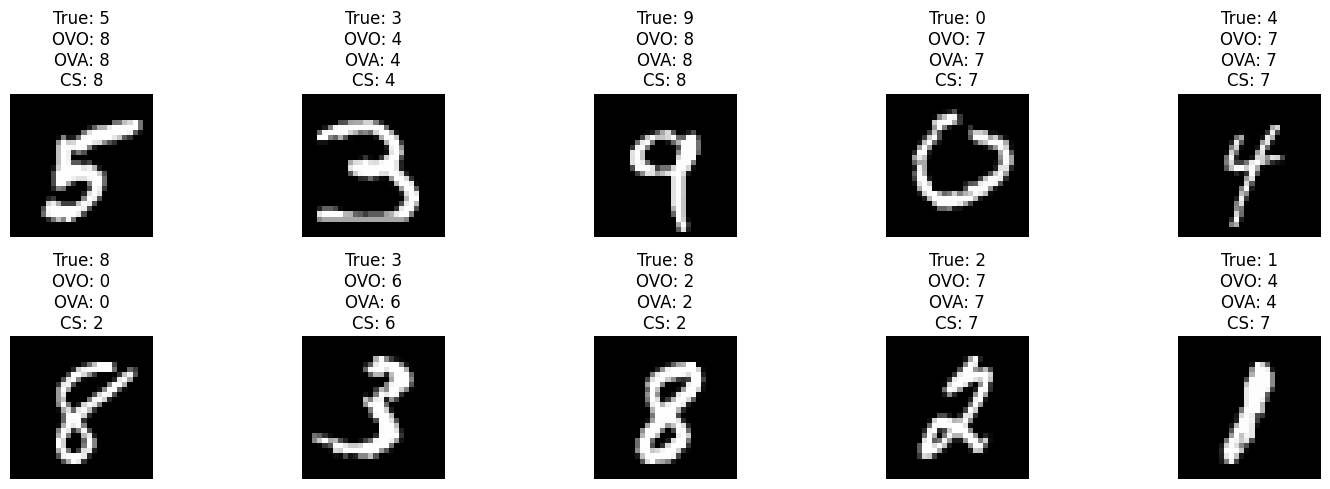


Evaluation for One-vs-One SVM:
Accuracy: 96.40%
Precision (macro): 96.34%
Recall (macro): 96.47%
F1-score (macro): 96.37%

Confusion Matrix:
[[ 94   0   0   0   0   0   1   0   0   0]
 [  0 103   1   0   0   0   0   0   0   0]
 [  0   0  93   0   1   0   1   0   0   0]
 [  0   1   1 111   0   3   0   1   2   0]
 [  0   0   2   1  84   0   1   0   0   0]
 [  0   0   0   3   1  86   0   0   0   0]
 [  0   0   0   0   0   0  97   0   0   0]
 [  0   1   1   0   0   0   0 101   0   0]
 [  2   0   1   0   2   1   3   0  92   0]
 [  1   0   1   0   2   0   0   0   1 103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.99      0.99       104
           2       0.93      0.98      0.95        95
           3       0.97      0.93      0.95       119
           4       0.93      0.95      0.94        88
           5       0.96      0.96      0.96        90
           6       0.94 

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, f1_score, 
                           precision_score, recall_score)

np.random.seed(42)
indices = np.random.choice(len(X_test), 10, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}\n'
              f'OVO: {y_pred_ovo[i]}\n'
              f'OVA: {y_pred_ova[i]}\n'
              f'CS: {y_pred_cs[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2%}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.2%}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.2%}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.2%}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test[:1000], y_pred_ovo, "One-vs-One SVM")
evaluate_model(y_test[:1000], y_pred_ova, "One-vs-Rest SVM")
evaluate_model(y_test[:1000], y_pred_cs, "Crammer-Singer SVM")